In [68]:
import numpy as np
from math_utils import compute_A_prime
from math import ceil
import matplotlib.pyplot as plt
import random

### Examine Dynamics of Memory Strength

In [59]:
#parameters 
tau_0 = 2e2
learning_rate = 9000e-3
tau = 5e-3 
epsilon = 0.1118
A_plus = 2
A_minus = -1.2
g = 0.1
tau_plus = 50e-3
tau_minus = 100e-3
A_plus_prime = compute_A_prime(A_plus, learning_rate, g, epsilon, tau)
A_minus_prime = compute_A_prime(A_minus, learning_rate, g, epsilon, tau)


In [110]:
simulation_time = 10 ** 3 #seconds
delta_t = 1e-4
arr_len = ceil(simulation_time/delta_t)
Ca_initial = 8
Ca = Ca_initial*np.ones(shape = (1, arr_len))  
dCadt_arr = np.zeros(shape = (1, arr_len))
t = np.arange(start=0, stop=simulation_time, step=delta_t)   

In [111]:
#simulate using forward-euler method

index = 1
for time in range(1, len(t)):

    Ca_prev = Ca[0,index-1]

    dCadt = (-Ca_prev + (1/(1 - g*Ca_prev))*( ((A_plus_prime)/ ( (1 - g*Ca_prev)/tau + (1/tau_plus) )) +  
                                            ((A_minus_prime)/ ( (1 - g*Ca_prev)/tau + (1/tau_minus) )))) * (tau_0**-1)
    Ca_i = dCadt * delta_t + Ca_prev

    #update values 
    dCadt_arr[0, index] = dCadt
    Ca[0, index] = Ca_i
    
    
    index += 1



Text(0, 0.5, '$\\frac{\\partial C_a(t)}{\\partial t}$')

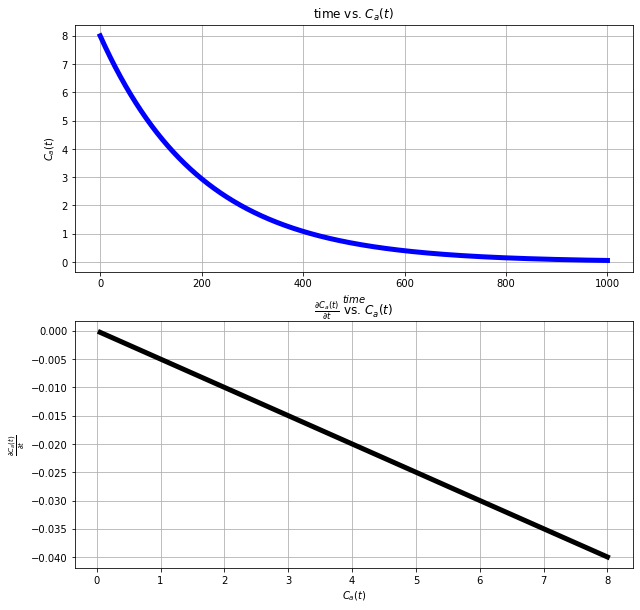

In [112]:
fig, axes = plt.subplots(2, 1, figsize = (10, 10)) 

    
axes[0].plot(t, Ca[0], color = 'blue', linewidth=5, markersize=10)
axes[0].grid(True)
axes[0].set_title("time vs. " r'$C_a(t)$')
axes[0].set_xlabel(r'$time$')
axes[0].set_ylabel(r'$C_a(t)$')
    
axes[1].plot(Ca[0, 1:], dCadt_arr[0, 1:], color = 'black', linewidth=5, markersize=10)
axes[1].grid(True)
axes[1].set_title(r'$\frac{\partial C_a(t)}{\partial t}$' " vs. "r'$C_a(t)$')
axes[1].set_xlabel(r'$C_a(t)$')
axes[1].set_ylabel(r'$\frac{\partial C_a(t)}{\partial t}$')


